In [2]:
import numpy as np
import pandas as pd
import time
import networkx as nx
import pickle
import random
from scipy.sparse import csr_matrix
import scipy.sparse as sparse
import littleballoffur as lbf
import matplotlib.pyplot as plt
from littleballoffur import RandomNodeSampler, DegreeBasedSampler, PageRankBasedSampler,RandomEdgeSampler
from littleballoffur import RandomNodeEdgeSampler,HybridNodeEdgeSampler,RandomEdgeSamplerWithPartialInduction,RandomEdgeSamplerWithInduction
from littleballoffur import RandomEdgeSamplerWithInduction, DiffusionSampler,DiffusionTreeSampler, ForestFireSampler, SpikyBallSampler
from littleballoffur import CommonNeighborAwareRandomWalkSampler,NonBackTrackingRandomWalkSampler, LoopErasedRandomWalkSampler
from littleballoffur import RandomWalkSampler, RandomWalkWithRestartSampler,MetropolisHastingsRandomWalkSampler, SnowBallSampler
from littleballoffur import CirculatedNeighborsRandomWalkSampler, BreadthFirstSearchSampler,DepthFirstSearchSampler, RandomWalkWithJumpSampler
from littleballoffur import CommunityStructureExpansionSampler, FrontierSampler,RandomNodeNeighborSampler, ShortestPathSampler
with open(r"C:\Users\hexie\OneDrive\Desktop\Projects\SAMPLING_DESKTOP\Sampling_codes\CommunityFitNet_updated.pickle", "rb") as input_file:
    DATA = pickle.load(input_file)
from multiprocessing import Pool 
#savepath = r"/home2/xhe/updated_edges//"
savepath = r"C:\Users\hexie\OneDrive\Desktop\Sampling_codes\\"
EDGELIST = DATA["edges_id"]
sampling_methods = ['RandomNodeSampler', 'DegreeBasedSampler', 'PageRankBasedSampler', 'RandomEdgeSampler',
 'RandomNodeEdgeSampler', 'HybridNodeEdgeSampler','RandomEdgeSamplerWithPartialInduction',
 'RandomEdgeSamplerWithInduction', 'DiffusionSampler',
 'DiffusionTreeSampler', 'ForestFireSampler', 'SpikyBallSampler',
 'CommonNeighborAwareRandomWalkSampler','NonBackTrackingRandomWalkSampler', 'LoopErasedRandomWalkSampler',
 'RandomWalkSampler', 'RandomWalkWithRestartSampler','MetropolisHastingsRandomWalkSampler', 'SnowBallSampler',
 'CirculatedNeighborsRandomWalkSampler', 'BreadthFirstSearchSampler',
 'DepthFirstSearchSampler', 'RandomWalkWithJumpSampler','CommunityStructureExpansionSampler', 'FrontierSampler',
 'RandomNodeNeighborSampler', 'ShortestPathSampler']
sampling_methods = ['RandomNodeSampler', 'DegreeBasedSampler', 'PageRankBasedSampler', 'RandomEdgeSampler',
 'RandomNodeEdgeSampler', 'HybridNodeEdgeSampler',
 'RandomEdgeSamplerWithInduction', 'DiffusionSampler',
 'ForestFireSampler',
 'NonBackTrackingRandomWalkSampler', 'LoopErasedRandomWalkSampler',
 'RandomWalkSampler', 'RandomWalkWithRestartSampler','MetropolisHastingsRandomWalkSampler', 
'CirculatedNeighborsRandomWalkSampler', 'BreadthFirstSearchSampler',
 'DepthFirstSearchSampler', 'RandomWalkWithJumpSampler',
 'RandomNodeNeighborSampler', 'ShortestPathSampler']

In [3]:
import networkx
print(networkx.__version__)

2.6


{0: [0, 0], 1: [0, 1], 2: [0, 2], 3: [0, 3], 4: [1, 0], 5: [1, 1], 6: [1, 2], 7: [1, 3], 8: [2, 0], 9: [2, 1], 10: [2, 2], 11: [2, 3], 12: [3, 0], 13: [3, 1], 14: [3, 2], 15: [3, 3], 16: [4, 0], 17: [4, 1], 18: [4, 2], 19: [4, 3]}


C:\ProgramData\Anaconda3\lib\site-packages\littleballoffur\backend.py:244: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  pagerank = nx.pagerank_scipy(graph, alpha=alpha)
C:\ProgramData\Anaconda3\lib\site-packages\littleballoffur\exploration_sampling\diffusionsampler.py:45: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  source_node = random.sample(self._sampled_nodes, 1)[0]
C:\ProgramData\Anaconda3\lib\site-packages\littleballoffur\exploration_sampling\forestfiresampler.py:63: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  burned_neighbors = random.sample(unvisited_neighbors, count)


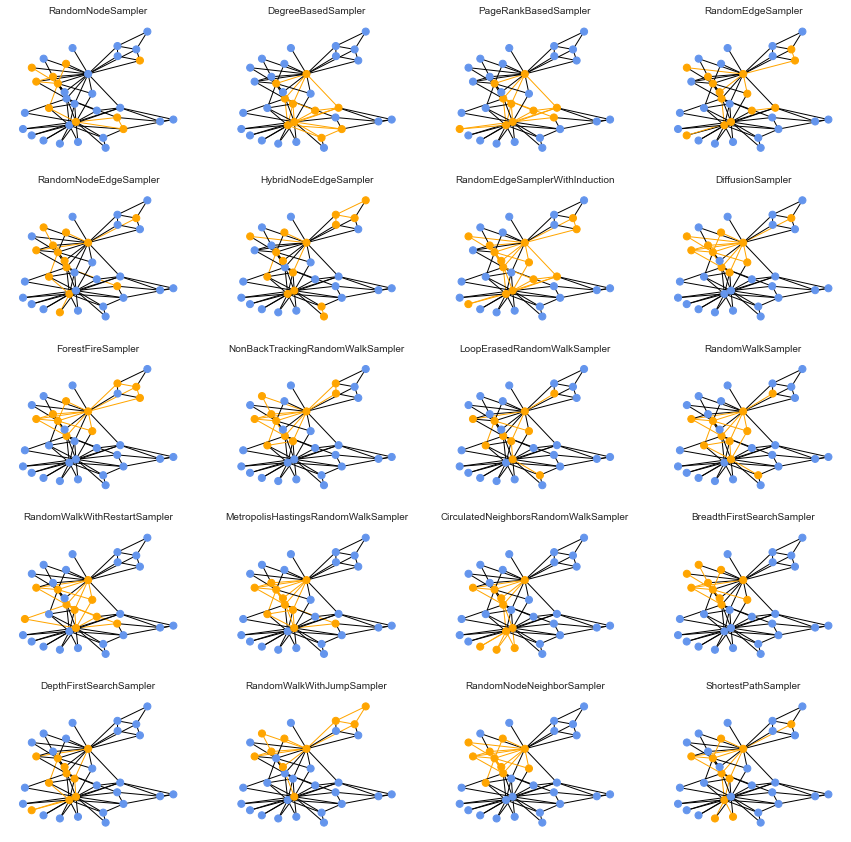

In [6]:

pos_dict = {}
count = 0
for x in range(5):
    for y in range(4):
        pos_dict[count] = [x,y]
        count = count+1
        

print(pos_dict)



G = nx.karate_club_graph()
fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(15, 15))

ax = axes.flatten()

pos=nx.spring_layout(G)


for i, samp in enumerate(sampling_methods):
    
    if samp == 'RandomEdgeSamplerWithPartialInduction':
        sampnode = 2
    elif samp=='RandomNodeNeighborSampler':
        sampnode = 2
    else:
        sampnode = 10
    
    method_to_call = getattr(lbf, samp)
    sampler = method_to_call(sampnode)
    new_graph = sampler.sample(G)
    
    colored = new_graph.nodes
    edge_colored = new_graph.edges
    
    color_map = []
    for node in G:
        if node in colored:
            color_map.append('orange')
        else: 
            color_map.append('cornflowerblue')      
    
    
    edge_color_map = []
    for edge in G.edges:
        if edge in edge_colored:
            edge_color_map.append('orange')
        else: 
            edge_color_map.append('black')   
    
    
    
    nx.draw(G,ax=ax[i], node_color=color_map, with_labels=False, pos=pos, node_size = 50, edge_color=edge_color_map)
    count = count +1
    
    ax[i].set_title(samp, fontsize=10)
    ax[i].set_axis_off()
    
    #fig = plt.figure()
    

    #nx.draw(G, node_color=color_map, with_labels=False, pos=pos)
    #plt.title(samp)
    #plt.show()
    #plt.close(fig)

    
#nx.draw(G,ax=ax[20], node_color='cornflowerblue', with_labels=False, pos=pos, node_size = 50, edge_color="black")

#ax[20].set_title("Original Karate Club", fontsize=10)
#ax[21].set_axis_off()
#ax[22].set_axis_off()
#ax[23].set_axis_off()

plt.savefig("figure0-sampling.pdf", bbox_inches='tight')